In [1]:
from pysr import *
import numpy as np
import matplotlib.pyplot as plt
from classy import Class
from scipy.stats import qmc

In [2]:
nm = 10
nk = 100
nz = 20
nas = 20
nns = 20
nob = 20
noc = 20
nh = 20
nc = 200

nmv = 21
nkv = 201
nzv = 41
nasv = 41
nnsv = 41
nobv = 41
nocv = 41
nhv = 41
ncv = 301

In [3]:
ni = 1000
comp = 25
pop = 70

In [4]:
# i plot di questo notebook hanno un k fisso, in unità di 1/(Mpc h^3)
kk = np.logspace(-4, np.log10(3), nk)
zz = np.linspace(0, 5, nz)

kkv = np.logspace(-4, np.log10(3), nkv)
zzv = np.linspace(0, 5, nzv)

# Modello $mbch$ ($m_\nu$, $\omega_b$, $\omega_c$ e $h$)

In [5]:
model_bch = PySRRegressor().from_file('../models/mu_bch(' +str(ni)+ ',' +str(comp)+ ',' +str(pop)+ ').pkl')
print(model_bch.get_best())
print(model_bch.latex())

Checking if ../models/mu_bch(1000,25,70).pkl exists...
Loading model from ../models/mu_bch(1000,25,70).pkl
complexity                                                      22
loss                                                      0.000002
score                                                     0.233258
equation         ((0.9039454 ^ (0.24926648 / ((exp(x4 + (x1 / (...
sympy_format     (0.9039454**(0.24926648*x0*exp(x1/(x0 + 0.2492...
lambda_format    PySRFunction(X=>(0.9039454**(0.24926648*x0*exp...
Name: 15, dtype: object
\left(0.904^{0.249 x_{0} \left(e^{\frac{x_{1}}{x_{0} + 0.249} + x_{4}}\right)^{- x_{2} x_{5} - 1.08}}\right)^{x_{2}}


* $x_0 = m_\nu$
* $x_1 = k$ 
* $x_2 = z$
* $x_3 = \omega_b$
* $x_4 = \omega_c$
* $x_5 = h$

$ \left(0.904^{0.249 x_{0} \left(e^{\frac{x_{1}}{x_{0} + 0.249} + x_{4}}\right)^{- x_{2} x_{5} - 1.08}}\right)^{x_{2}} $

In [7]:
# preparo il plot delle differenze con il training dataset

diffk_bch = np.zeros([nc*nz,nk])
diffz_bch = np.zeros([nc*nk,nz])

data_bch = np.load('../files/data_bch_[' +str(nk)+ ',' +str(nz)+ ',comb=' +str(nc)+ '].npy')

testk_bch = data_bch[np.argsort(data_bch[:, 1])]
for i in range(nk) :
    diffk_bch[:,i] = 100*np.abs(1-model_bch.predict(testk_bch[i*nc*nz:i*nc*nz+nc*nz,:-1])/testk_bch[i*nc*nz:i*nc*nz+nc*nz,-1])
diffk_bch = np.sort(diffk_bch, axis=0)

testz_bch = data_bch[np.argsort(data_bch[:, 2])]
for i in range(nz) :
    diffz_bch[:,i] = 100*np.abs(1-model_bch.predict(testz_bch[i*nc*nk:i*nc*nk+nc*nk,:-1])/testz_bch[i*nc*nk:i*nc*nk+nc*nk,-1])
diffz_bch = np.sort(diffz_bch, axis=0)


In [8]:
# preparo il plot delle differenze con il validation dataset

data_bch_v = np.load('../files/data-val_bch_[' +str(nkv)+ ',' +str(nzv)+ ',comb=' +str(ncv)+ '].npy')

diffk_bch_v = np.zeros([ncv*nzv,nkv])
diffz_bch_v = np.zeros([ncv*nkv,nzv])

testk_bch_v = data_bch_v[np.argsort(data_bch_v[:, 1])]
for i in range(nkv) :
    diffk_bch_v[:,i] = 100*np.abs(1-model_bch.predict(testk_bch_v[i*ncv*nzv:i*ncv*nzv+ncv*nzv,:-1])/testk_bch_v[i*ncv*nzv:i*ncv*nzv+ncv*nzv,-1])
diffk_bch_v = np.sort(diffk_bch_v, axis=0)

testz_bch_v = data_bch_v[np.argsort(data_bch_v[:, 2])]
for i in range(nzv) :
    diffz_bch_v[:,i] = 100*np.abs(1-model_bch.predict(testz_bch_v[i*ncv*nkv:i*ncv*nkv+ncv*nkv,:-1])/testz_bch_v[i*ncv*nkv:i*ncv*nkv+ncv*nkv,-1])
diffz_bch_v = np.sort(diffz_bch_v, axis=0)


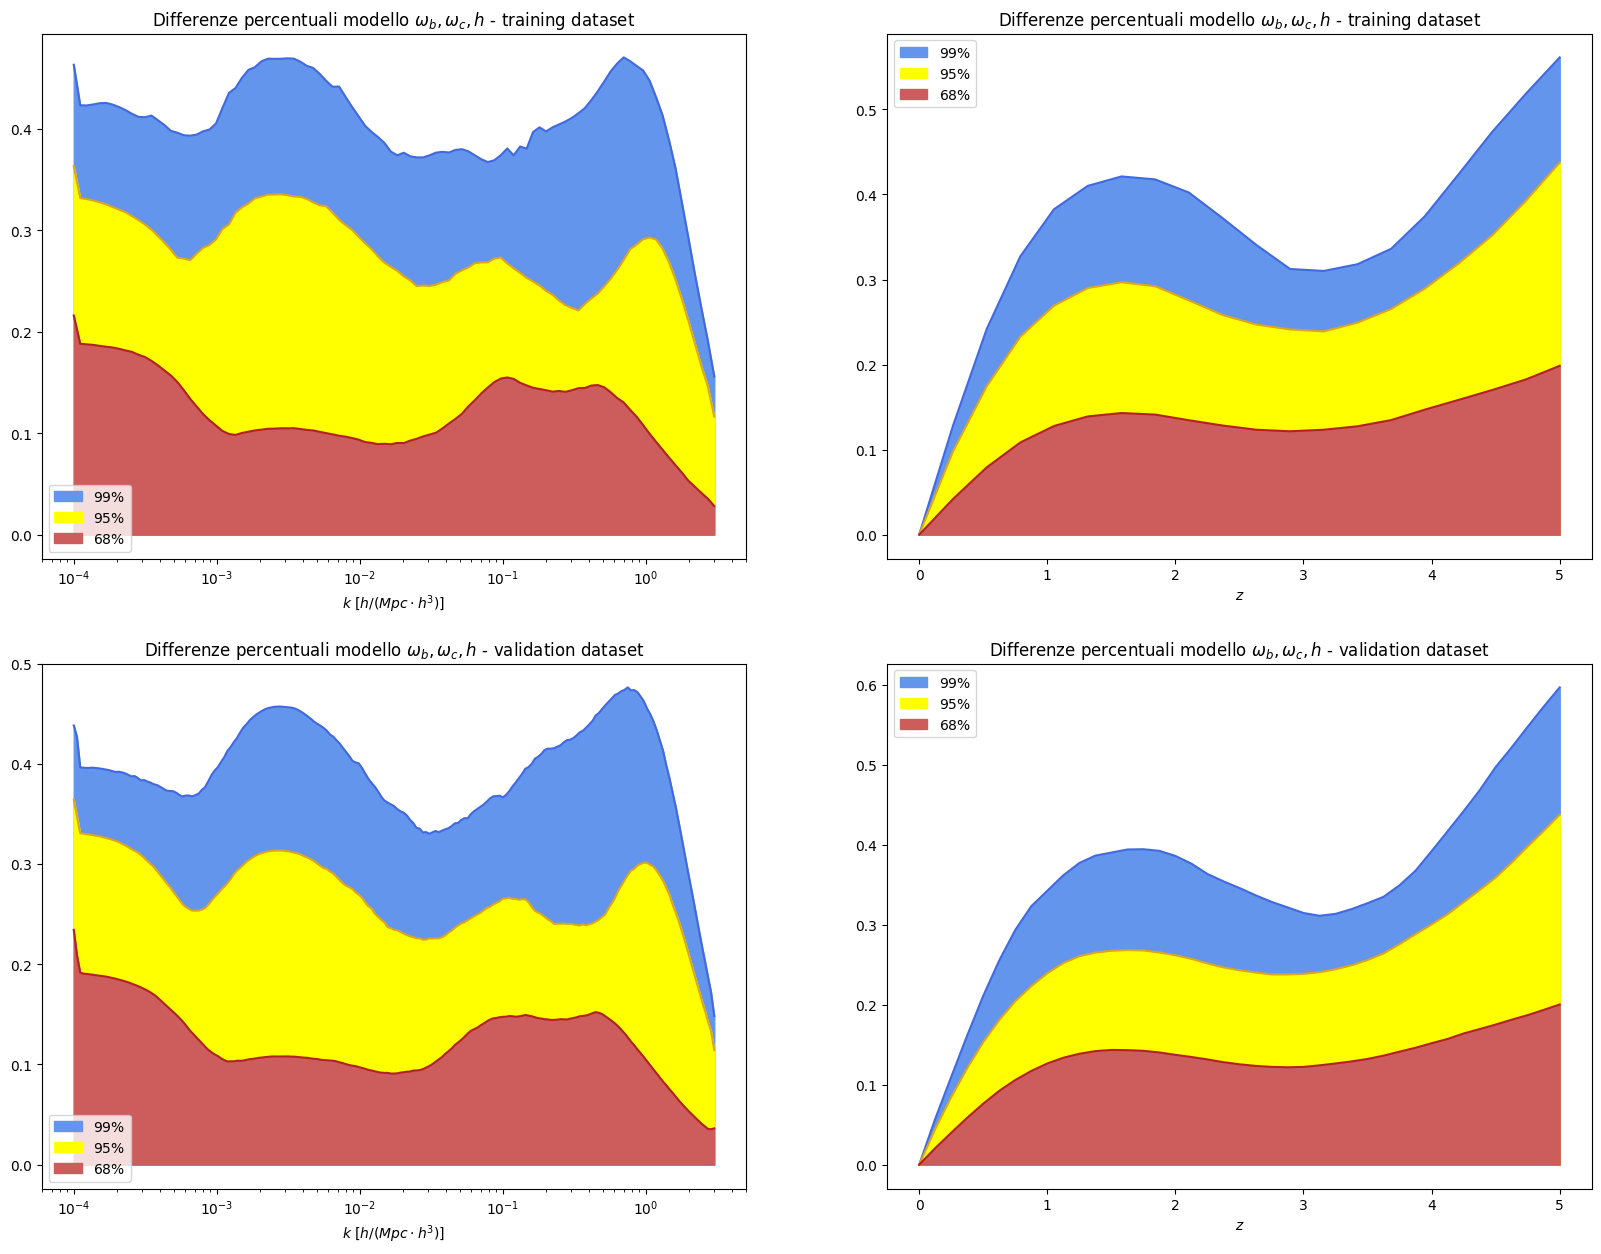

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15), gridspec_kw={'hspace': 0.2, 'wspace': 0.2})

x = [[kk, zz], [kkv, zzv]]
diff = [[diffk_bch, diffz_bch], [diffk_bch_v, diffz_bch_v]]

for i in range(2) :
    for j in range(2) :
        ind99 = int((diff[i][j].shape[0]/100)*99)
        axs[i,j].plot(x[i][j], diff[i][j][ind99,:], color='royalblue')
        axs[i,j].fill_between(x[i][j], diff[i][j][ind99,:], color='cornflowerblue', label='$99\%$')

        ind95 = int((diff[i][j].shape[0]/100)*95)
        axs[i,j].plot(x[i][j], diff[i][j][ind95,:], color='goldenrod')
        axs[i,j].fill_between(x[i][j], diff[i][j][ind95,:], color='yellow', label='$95\%$')

        ind68 = int((diff[i][j].shape[0]/100)*68)
        axs[i,j].plot(x[i][j], diff[i][j][ind68,:], color='firebrick')
        axs[i,j].fill_between(x[i][j], diff[i][j][ind68,:], color='indianred', label='$68\%$')

        axs[i,j].legend()
        axs[0,j].set_title('Differenze percentuali modello $\omega_b, \omega_c, h$ - training dataset')
        axs[1,j].set_title('Differenze percentuali modello $\omega_b, \omega_c, h$ - validation dataset')
        
        axs[i,0].set_xscale('log')
        axs[i,0].set_xlabel('$k \ [h/(Mpc \cdot h^3)]$')
        axs[i,1].set_xlabel('$z$')

plt.savefig('../plots/diff_bch_cfr.pdf')
plt.show()

# Modello $VBCh$ ($\Omega_\nu$, $\Omega_b$, $\Omega_c$ e $h$)

In [10]:
model_VBCh = PySRRegressor().from_file('../models/mu_VBCh(' +str(ni)+ ',' +str(comp)+ ',' +str(pop)+ ').pkl')
print(model_VBCh.get_best())
print(model_VBCh.latex())

Checking if ../models/mu_VBCh(1000,25,70).pkl exists...
Loading model from ../models/mu_VBCh(1000,25,70).pkl
complexity                                                      21
loss                                                      0.000002
score                                                     0.117217
equation         ((0.92716193 + x2) ^ (x0 * (-1.5854899 * (((x5...
sympy_format     (x2 + 0.92716193)**(x0*(1.5854899*x0 + 1.58548...
lambda_format    PySRFunction(X=>(x2 + 0.92716193)**(x0*(1.5854...
Name: 14, dtype: object
\left(x_{2} + 0.927\right)^{x_{0} \cdot \left(1.59 x_{0} + 1.59 x_{4} - 1.59 x_{5}^{\frac{0.156 x_{1}}{x_{0}}} - 0.498\right)}


- $x_0 = \Omega_\nu$
- $x_1 = k$
- $x_2 = z$
- $x_3 = \Omega_b$
- $x_4 = \Omega_c$
- $x_5 = h$

$\left(x_{2} + 0.927\right)^{x_{0} \cdot \left(1.59 x_{0} + 1.59 x_{4} - 1.59 x_{5}^{\frac{0.156 x_{1}}{x_{0}}} - 0.498\right)}$

In [13]:
# preparo il plot delle differenze con il training dataset

diffk_VBCh = np.zeros([nc*nz,nk])
diffz_VBCh = np.zeros([nc*nk,nz])

data_VBCh = np.load('../files/data_VBCh_[' +str(nk)+ ',' +str(nz)+ ',comb=' +str(nc)+ '].npy')

testk_VBCh = data_VBCh[np.argsort(data_VBCh[:, 1])]
for i in range(nk) :
    diffk_VBCh[:,i] = 100*np.abs(1-model_VBCh.predict(testk_VBCh[i*nc*nz:i*nc*nz+nc*nz,:-1])/testk_VBCh[i*nc*nz:i*nc*nz+nc*nz,-1])
diffk_VBCh = np.sort(diffk_VBCh, axis=0)

testz_VBCh = data_VBCh[np.argsort(data_VBCh[:, 2])]
for i in range(nz) :
    diffz_VBCh[:,i] = 100*np.abs(1-model_VBCh.predict(testz_VBCh[i*nc*nk:i*nc*nk+nc*nk,:-1])/testz_VBCh[i*nc*nk:i*nc*nk+nc*nk,-1])
diffz_VBCh = np.sort(diffz_VBCh, axis=0)


In [14]:
# preparo il plot delle differenze con il validation dataset

data_VBCh_v = np.load('../files/data-val_VBCh_[' +str(nkv)+ ',' +str(nzv)+ ',comb=' +str(ncv)+ '].npy')

diffk_VBCh_v = np.zeros([ncv*nzv,nkv])
diffz_VBCh_v = np.zeros([ncv*nkv,nzv])

testk_VBCh_v = data_VBCh_v[np.argsort(data_VBCh_v[:, 1])]
for i in range(nkv) :
    diffk_VBCh_v[:,i] = 100*np.abs(1-model_VBCh.predict(testk_VBCh_v[i*ncv*nzv:i*ncv*nzv+ncv*nzv,:-1])/testk_VBCh_v[i*ncv*nzv:i*ncv*nzv+ncv*nzv,-1])
diffk_VBCh_v = np.sort(diffk_VBCh_v, axis=0)

testz_VBCh_v = data_VBCh_v[np.argsort(data_VBCh_v[:, 2])]
for i in range(nzv) :
    diffz_VBCh_v[:,i] = 100*np.abs(1-model_VBCh.predict(testz_VBCh_v[i*ncv*nkv:i*ncv*nkv+ncv*nkv,:-1])/testz_VBCh_v[i*ncv*nkv:i*ncv*nkv+ncv*nkv,-1])
diffz_VBCh_v = np.sort(diffz_VBCh_v, axis=0)


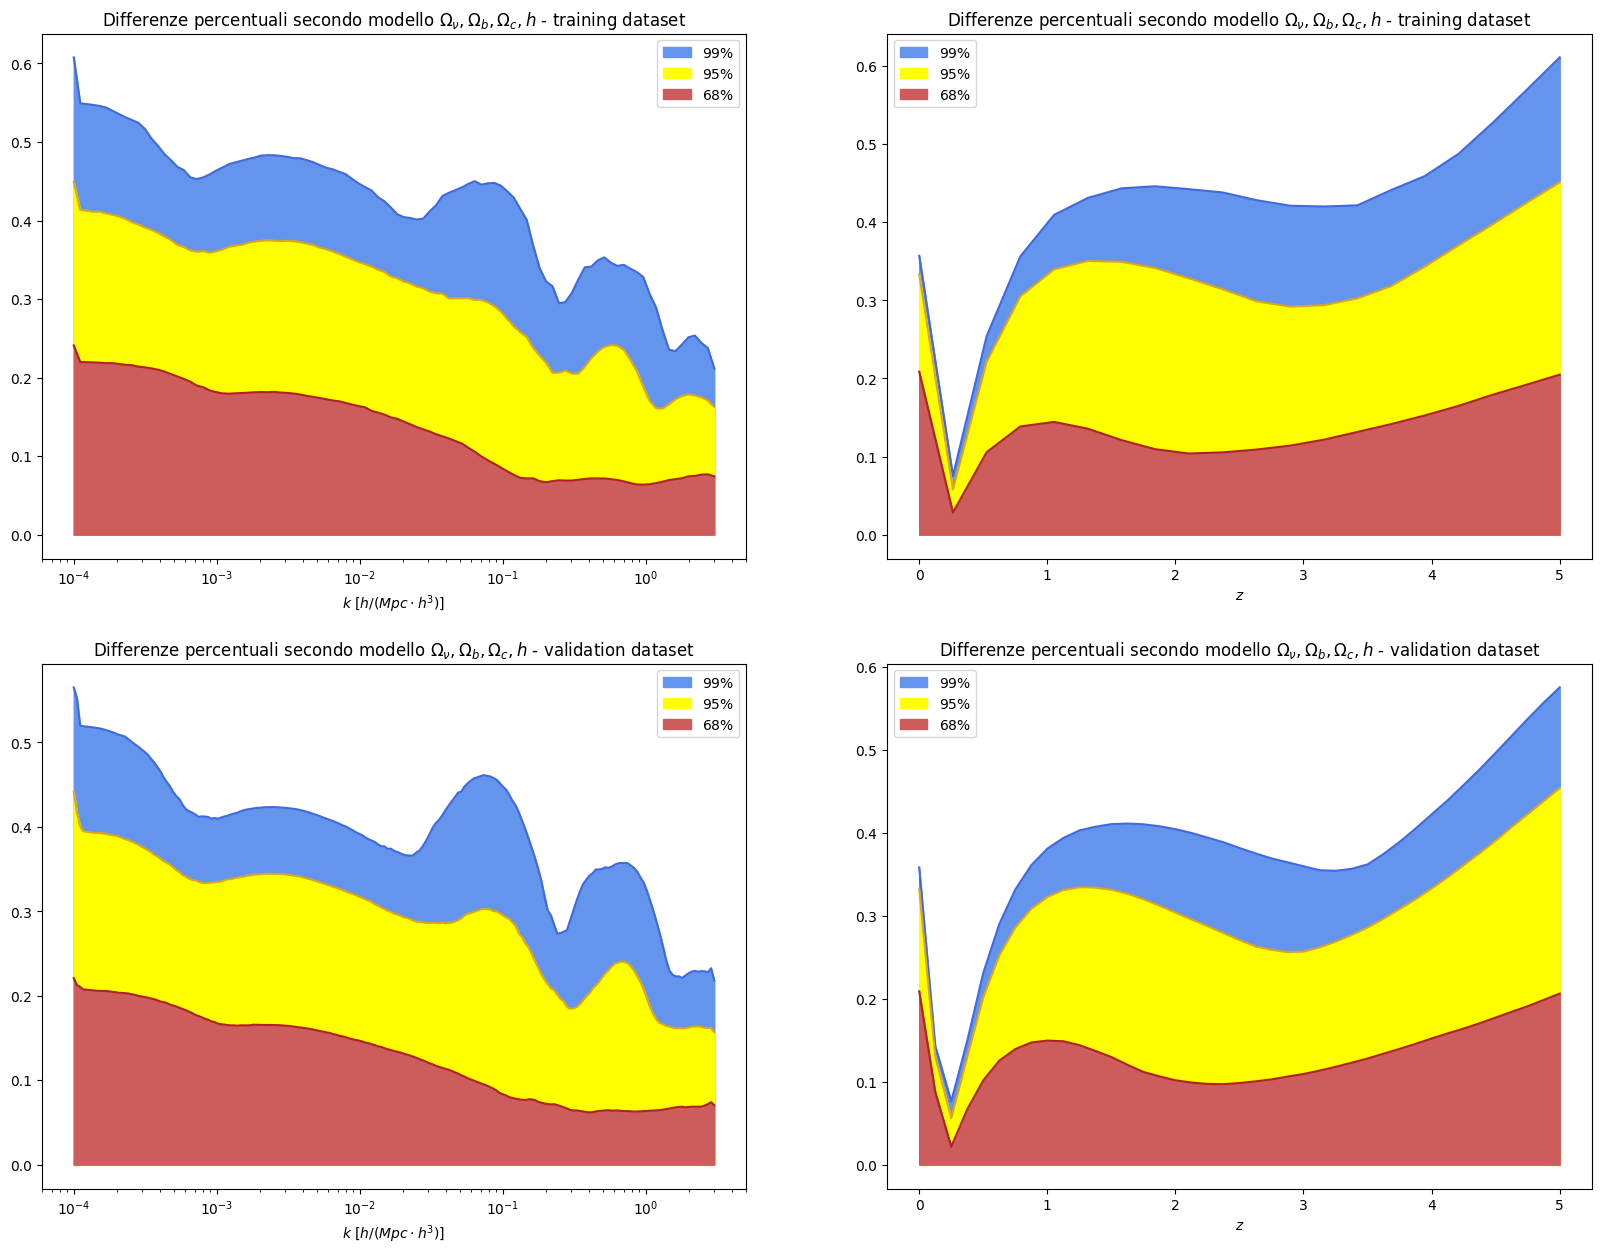

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15), gridspec_kw={'hspace': 0.2, 'wspace': 0.2})

x = [[kk, zz], [kkv, zzv]]
diff = [[diffk_VBCh, diffz_VBCh], [diffk_VBCh_v, diffz_VBCh_v]]

for i in range(2) :
    for j in range(2) :
        ind99 = int((diff[i][j].shape[0]/100)*99)
        axs[i,j].plot(x[i][j], diff[i][j][ind99,:], color='royalblue')
        axs[i,j].fill_between(x[i][j], diff[i][j][ind99,:], color='cornflowerblue', label='$99\%$')

        ind95 = int((diff[i][j].shape[0]/100)*95)
        axs[i,j].plot(x[i][j], diff[i][j][ind95,:], color='goldenrod')
        axs[i,j].fill_between(x[i][j], diff[i][j][ind95,:], color='yellow', label='$95\%$')

        ind68 = int((diff[i][j].shape[0]/100)*68)
        axs[i,j].plot(x[i][j], diff[i][j][ind68,:], color='firebrick')
        axs[i,j].fill_between(x[i][j], diff[i][j][ind68,:], color='indianred', label='$68\%$')

        axs[i,j].legend()
        axs[0,j].set_title(r'Differenze percentuali secondo modello $\Omega_\nu, \Omega_b, \Omega_c, h$ - training dataset')
        axs[1,j].set_title(r'Differenze percentuali secondo modello $\Omega_\nu, \Omega_b, \Omega_c, h$ - validation dataset')
        
        axs[i,0].set_xscale('log')
        axs[i,0].set_xlabel('$k \ [h/(Mpc \cdot h^3)]$')
        axs[i,1].set_xlabel('$z$')

plt.savefig('../plots/diff_VBCh_cfr.pdf')
plt.show()

# Modello $VBMh$ ($\Omega_\nu, \Omega_b, \Omega_m$ e $h$)

In [16]:
model_VBMh = PySRRegressor().from_file('../models/mu_VBMh(' +str(ni)+ ',' +str(comp)+ ',' +str(pop)+ ').pkl')
print(model_VBMh.get_best())
print(model_VBMh.latex())

Checking if ../models/mu_VBMh(1000,25,70).pkl exists...
Loading model from ../models/mu_VBMh(1000,25,70).pkl
complexity                                                      21
loss                                                      0.000002
score                                                     0.130693
equation         (((x4 ^ (x2 ^ 0.6275656)) ^ x0) ^ ((x0 / (x3 ^...
sympy_format     ((x4**(x2**0.6275656))**x0)**((x0/x3**x5)**((x...
lambda_format    PySRFunction(X=>((x4**(x2**0.6275656))**x0)**(...
Name: 15, dtype: object
\left(\left(x_{4}^{x_{2}^{0.628}}\right)^{x_{0}}\right)^{\left(x_{0} x_{3}^{- x_{5}}\right)^{\frac{x_{0}^{x_{2}} + x_{1}}{x_{5}}}}


- $x_0 = \Omega_\nu$
- $x_1 = k$
- $x_2 = z$
- $x_3 = \Omega_b$
- $x_4 = \Omega_c$
- $x_5 = h$

$ \left(\left(x_{4}^{x_{2}^{0.628}}\right)^{x_{0}}\right)^{\left(x_{0} x_{3}^{- x_{5}}\right)^{\frac{x_{0}^{x_{2}} + x_{1}}{x_{5}}}} $

In [20]:
# preparo il plot delle differenze con il training dataset

diffk_VBMh = np.zeros([nc*nz,nk])
diffz_VBMh = np.zeros([nc*nk,nz])

data_VBMh = np.load('../files/data_VBMh_[' +str(nk)+ ',' +str(nz)+ ',comb=' +str(nc)+ '].npy')

testk_VBMh = data_VBMh[np.argsort(data_VBMh[:, 1])]
for i in range(nk) :
    diffk_VBMh[:,i] = 100*np.abs(1-model_VBMh.predict(testk_VBMh[i*nc*nz:i*nc*nz+nc*nz,:-1])/testk_VBMh[i*nc*nz:i*nc*nz+nc*nz,-1])
diffk_VBMh = np.sort(diffk_VBMh, axis=0)

testz_VBMh = data_VBMh[np.argsort(data_VBMh[:, 2])]
for i in range(nz) :
    diffz_VBMh[:,i] = 100*np.abs(1-model_VBMh.predict(testz_VBMh[i*nc*nk:i*nc*nk+nc*nk,:-1])/testz_VBMh[i*nc*nk:i*nc*nk+nc*nk,-1])
diffz_VBMh = np.sort(diffz_VBMh, axis=0)


In [21]:
# preparo il plot delle differenze con il validation dataset

data_VBMh_v = np.load('../files/data-val_VBMh_[' +str(nkv)+ ',' +str(nzv)+ ',comb=' +str(ncv)+ '].npy')

diffk_VBMh_v = np.zeros([ncv*nzv,nkv])
diffz_VBMh_v = np.zeros([ncv*nkv,nzv])

testk_VBMh_v = data_VBMh_v[np.argsort(data_VBMh_v[:, 1])]
for i in range(nkv) :
    diffk_VBMh_v[:,i] = 100*np.abs(1-model_VBMh.predict(testk_VBMh_v[i*ncv*nzv:i*ncv*nzv+ncv*nzv,:-1])/testk_VBMh_v[i*ncv*nzv:i*ncv*nzv+ncv*nzv,-1])
diffk_VBMh_v = np.sort(diffk_VBMh_v, axis=0)

testz_VBMh_v = data_VBMh_v[np.argsort(data_VBMh_v[:, 2])]
for i in range(nzv) :
    diffz_VBMh_v[:,i] = 100*np.abs(1-model_VBMh.predict(testz_VBMh_v[i*ncv*nkv:i*ncv*nkv+ncv*nkv,:-1])/testz_VBMh_v[i*ncv*nkv:i*ncv*nkv+ncv*nkv,-1])
diffz_VBMh_v = np.sort(diffz_VBMh_v, axis=0)


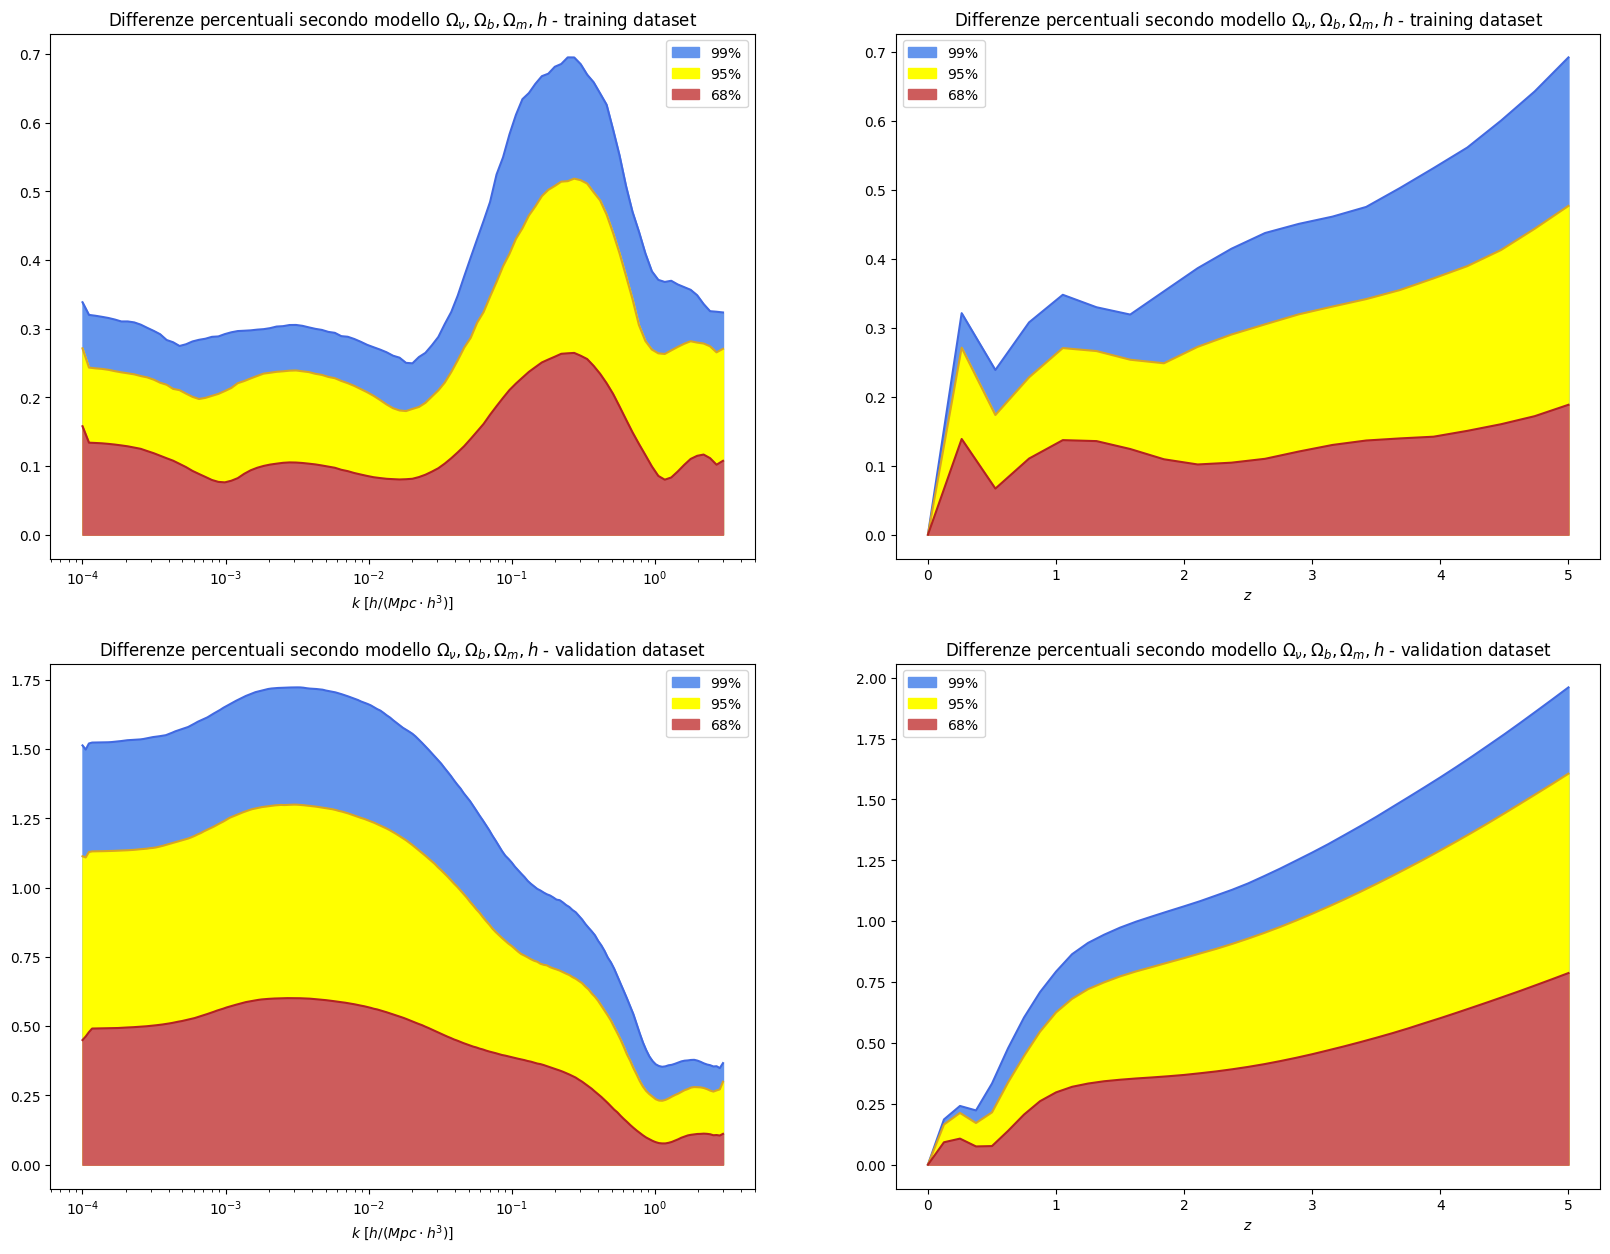

In [22]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15), gridspec_kw={'hspace': 0.2, 'wspace': 0.2})

x = [[kk, zz], [kkv, zzv]]
diff = [[diffk_VBMh, diffz_VBMh], [diffk_VBMh_v, diffz_VBMh_v]]

for i in range(2) :
    for j in range(2) :
        ind99 = int((diff[i][j].shape[0]/100)*99)
        axs[i,j].plot(x[i][j], diff[i][j][ind99,:], color='royalblue')
        axs[i,j].fill_between(x[i][j], diff[i][j][ind99,:], color='cornflowerblue', label='$99\%$')

        ind95 = int((diff[i][j].shape[0]/100)*95)
        axs[i,j].plot(x[i][j], diff[i][j][ind95,:], color='goldenrod')
        axs[i,j].fill_between(x[i][j], diff[i][j][ind95,:], color='yellow', label='$95\%$')

        ind68 = int((diff[i][j].shape[0]/100)*68)
        axs[i,j].plot(x[i][j], diff[i][j][ind68,:], color='firebrick')
        axs[i,j].fill_between(x[i][j], diff[i][j][ind68,:], color='indianred', label='$68\%$')

        axs[i,j].legend()
        axs[0,j].set_title(r'Differenze percentuali secondo modello $\Omega_\nu, \Omega_b, \Omega_m, h$ - training dataset')
        axs[1,j].set_title(r'Differenze percentuali secondo modello $\Omega_\nu, \Omega_b, \Omega_m, h$ - validation dataset')
        
        axs[i,0].set_xscale('log')
        axs[i,0].set_xlabel('$k \ [h/(Mpc \cdot h^3)]$')
        axs[i,1].set_xlabel('$z$')

plt.savefig('../plots/diff_VBMh.pdf')
plt.show()